In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

from operator import itemgetter
from datetime import datetime
from datetime import timezone
from dateutil.tz import gettz

import urllib.request as request
import json
import collections
import hashlib
import hmac
import time
import pytz

# Define some fonts and colors for nice plots
colors = {'blue':'#1d7fb8',
          'gold': '#e1971b',
          'green': '#059567',
          'brown': '#d9775a',
          'purple':'#ca18de',
          'red': '#ac0000'
         }

plt.rcParams['figure.dpi'] = 150

font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 7}
matplotlib.rc('font', **font)

myFmt = mdates.DateFormatter('%m-%d\n%H:%M')

# Define a function to remove borders from plots
def remove_borders(ax, lw=1, l_len=3):
    #Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Set axis thickness
    ax.spines['bottom'].set_linewidth(lw)
    ax.spines['left'].set_linewidth(lw)
    # ax.spines['left'].set_bounds(0, 12.5)

    ax.xaxis.set_tick_params(length=l_len, width=lw)
    ax.yaxis.set_tick_params(length=l_len, width=lw)

In [3]:
# Download reference temp data

# Convert local time PDT to UTC timestamp starting at 0:00 that day
# Default value set to 
def to_timestamp(t="2021-4-27"):
    local_time = pytz.timezone("America/Los_Angeles")
    naive_datetime = datetime.strptime (t, "%Y-%m-%d")
    local_datetime = local_time.localize(naive_datetime, is_dst=False)
    utc_datetime = local_datetime.astimezone(pytz.utc)
    return int(utc_datetime.timestamp())


In [10]:
# Read in the data
#f = files.upload()
with open('co_3.csv') as f:
    data = f.readlines()[2:]

id = []
co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        #print((col[2][:18]))
        #col[1] = col[3][1:]
        #print(col[1])
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

day3_3 = pd.DataFrame(
        {"CO (ppm)":pd.to_numeric(co_ppm, errors='coerce'),
         "id":pd.to_numeric(id, errors='coerce')}, index=t)
print(day3_3)

                     CO (ppm)       id
2022-08-26 22:00:19     -1.00  2307251
2022-08-26 22:00:28     -0.10  2307251
2022-08-26 22:00:38      2.82  2307251
2022-08-26 22:00:46     -1.15  2307251
2022-08-26 22:00:56     -2.38  2307251
...                       ...      ...
2022-09-01 18:17:27      1.75  2307251
2022-09-01 18:17:36      2.21  2307251
2022-09-01 18:17:47      5.43  2307251
2022-09-01 18:17:55      5.11  2307251
2022-09-01 18:20:03      2.46  2307251

[55984 rows x 2 columns]


In [12]:
# Read in the data
#f = files.upload()
with open('digitalco_1.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        #print((col[2][:18]))
        #col[1] = col[3][1:]
        #print(col[1])
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

day3_1 = pd.DataFrame(
        {"CO (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce'),
         "id":pd.to_numeric(id, errors='coerce')}, index=t)
print(day3_1)

                     CO (ppm)       id
2022-08-26 22:00:19      0.18  2307249
2022-08-26 22:00:27      0.48  2307249
2022-08-26 22:00:37      0.14  2307249
2022-08-26 22:00:45     -0.69  2307249
2022-08-26 22:00:55      0.41  2307249
...                       ...      ...
2022-09-02 17:06:31     -1.42  2307249
2022-09-02 17:06:40     -0.11  2307249
2022-09-02 17:06:49     -0.80  2307249
2022-09-02 17:06:58     -0.95  2307249
2022-09-02 17:07:07     -0.68  2307249

[63700 rows x 2 columns]


In [13]:
# Read in the data
#f = files.upload()
with open('analogco_2.csv') as f:
    data = f.readlines()[2:]

id = []
analog_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        #print((col[2][:18]))
        #col[1] = col[3][1:]
        #print(col[1])
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        analog_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

day3_2 = pd.DataFrame(
        {"CO (ppm)":pd.to_numeric(analog_co_ppm, errors='coerce'),
         "id":pd.to_numeric(id, errors='coerce')}, index=t)
print(day3_2)

                     CO (ppm)       id
2022-08-26 22:00:19     20.17  2307250
2022-08-26 22:00:28     15.44  2307250
2022-08-26 22:00:37     12.92  2307250
2022-08-26 22:00:46     14.59  2307250
2022-08-26 22:00:56     19.43  2307250
...                       ...      ...
2022-09-02 17:06:41     -2.81  2307250
2022-09-02 17:06:50      0.45  2307250
2022-09-02 17:06:58     -1.40  2307250
2022-09-02 17:07:07     -3.53  2307250
2022-09-02 17:07:16     -2.46  2307250

[63690 rows x 2 columns]


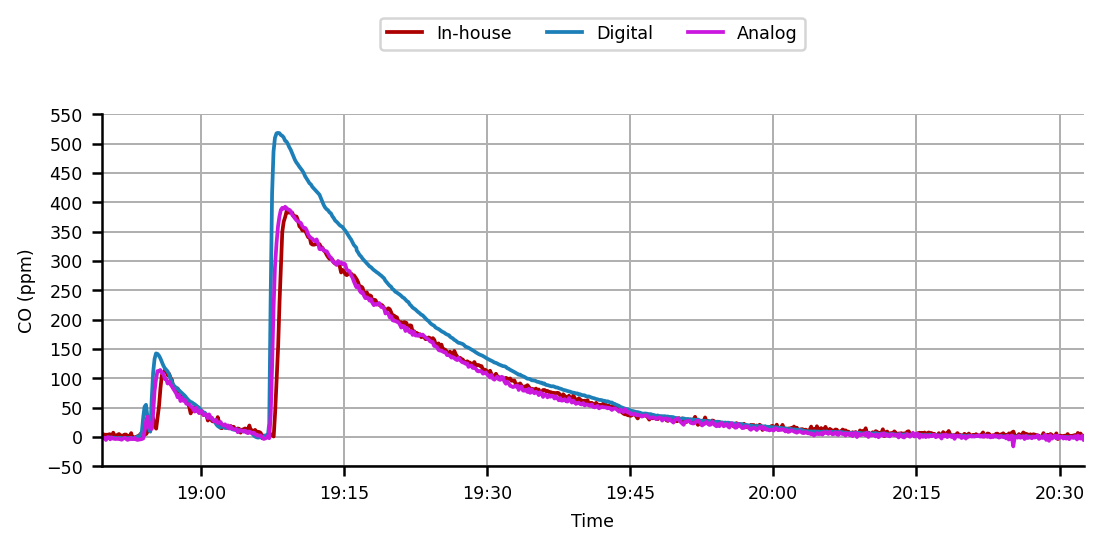

In [53]:
start_date='2022-08-26'

# This is selecting a subset of the data to plot and then resampling it to 1 min intervals
day3_digital_co_ppm = day3_1['CO (ppm)'][33000:38000]
day3_analog_co_ppm = day3_2['CO (ppm)'][33000:38000]
day3_my_co_ppm = day3_3['CO (ppm)'][33000:38000]
#print(day3_my_co_ppm)

# Set up and plot the data
w,h = plt.figaspect(.3)
fig = plt.figure(figsize=(6,3), dpi=180)
ax1 = fig.add_subplot(111)

l_my_co_ppm, = ax1.plot(day3_my_co_ppm, label="In-house", linewidth=1.5, color=colors['red'], linestyle='-')
l_digital_co_ppm, = ax1.plot(day3_digital_co_ppm, label="Digital", linewidth=1.5, color=colors['blue'], linestyle='-')
l_analog_co_ppm, = ax1.plot(day3_analog_co_ppm, label="Analog", linewidth=1.5, color=colors['purple'], linestyle='-')
ax1.set_xlim(pd.Timestamp('2022-08-30 18:49:36'), pd.Timestamp('2022-08-30 20:32:31'))

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt)

remove_borders(ax1, lw=1, l_len=4)

plt.grid()
plt.yticks(np.arange(-50, 600, 50))
plt.legend(handles=[l_my_co_ppm, l_digital_co_ppm, l_analog_co_ppm,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=8, loc='upper center')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
#fig.subplots_adjust(hspace=0.001)
plt.ylabel("CO (ppm)")
plt.xlabel("Time")
plt.savefig(r'C:\Users\chlsk\OneDrive\Desktop\Sensors\CO\plot', format='svg', dpi=300)

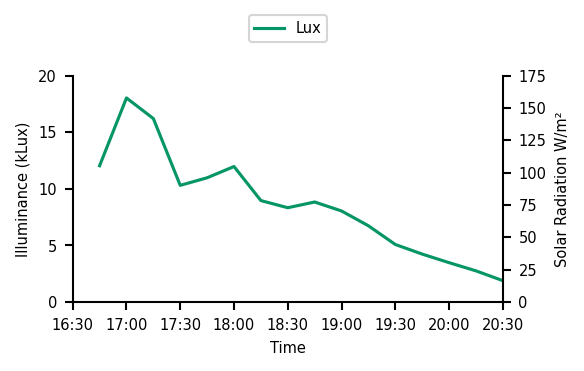

In [ ]:
day3_lux1 = day3['Lux'][1000:15600].resample('1min').mean()[4:-6].resample('15min', label='right').mean()/1000
#sun1 = ref_temp['solar_rad_avg'][start_date:][16*4+3:20*4+3]

day3_lux2 = day3['Lux'][55000:73400].resample('1min').mean()[12:88].resample('15min', label='right').mean()/1000
#sun2 = ref_temp['solar_rad_avg'][start_date:][32*4:33*4+2]

# Plot temperature
fig = plt.figure(figsize=(3.7,2))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
#l_sun_ref1, = ax2.plot(sun1, label="Reference", linewidth=1.5, color='k')
#l_sun_ref2, = ax2.plot(sun2, label="Reference", linewidth=1.5, color='k')


l_lux, = ax1.plot(day3_lux1, label="Lux", linewidth=1.5, color=colors['green'])
l_lux, = ax1.plot(day3_lux2, label="Lux", linewidth=1.5, color=colors['green'])

ax1.set_ylabel("Illuminance (kLux)")
ax1.set_xlabel("Time")
ax1.set_ylim(0,20)
ax2.set_ylim(0,175)

ax1.xaxis.set_major_formatter(myFmt)
ax1.set_xlim(pd.Timestamp('2021-07-16 16:30:00'), pd.Timestamp('2021-07-16 20:30:00'))
#ax1.set_xlim(pd.Timestamp('2021-07-16 16:30:00'), pd.Timestamp('2021-07-17 09:15:00'))

ax2.set_ylabel("Solar Radiation W/m²")
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.set_tick_params(length=4, width=1)
ax1.yaxis.set_tick_params(length=4, width=1)
ax2.xaxis.set_tick_params(length=4, width=1)
ax2.yaxis.set_tick_params(length=4, width=1)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1)
ax2.spines['right'].set_linewidth(1)
#plt.grid()
plt.legend(handles=[l_lux,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=2, loc='upper center')
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)
#plt.savefig('subfigs/outdoor_solar_lux.svg', format='svg', dpi=300)